In [13]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

---

In [47]:
def estimate_coefficients(x, y):
    # берем размер X
    size_x = np.size(x)

    # оцениваем среднейй
    mean_x, mean_y = np.mean(x), np.mean(y)

    # вычисляем стандартное отклонение и отклонение от x
    cross_deviation_xy = np.sum(y * x - size_x * mean_y * mean_x)
    cross_deviation_xx = np.sum(x * x - size_x * mean_x * mean_x)

    # вычисляем  коеф. регр. (по которым необходимо переместить линию регрессии)
    regr_coef_1 = cross_deviation_xy / cross_deviation_xx
    regr_coef_0 = mean_y - regr_coef_1 * mean_x

    return regr_coef_0, regr_coef_1

In [62]:
def plot(x, y, b):
    plt.scatter(x, y, color='b', marker='o')

    y_pred = b[0] + b[1] * x

    plt.plot(x, y_pred, color='r')

    plt.xlabel('size')
    plt.ylabel('cost')

    #plt.show()

In [104]:
# основная ф-я, которая генерит случайные (x,y) и строить уже готовый график с коэфф.
def main():
    # генерим массив случайных целых чисел
    x = np.array(np.random.randint(100, size=20))
    y = np.array(np.random.randint(100, size=20))
    print('вектор x: ', x)
    print('вектор y: ', y)

    estimate_coef = estimate_coefficients(x, y)
    print('коэффициенты: ({},{})'.format(estimate_coef[0], estimate_coef[1]))

    plot(x, y, estimate_coef)

вектор x:  [94 95  6 25  4 93 94 60 13 40 24 69 73 68  1 13 81 24 54 45]
вектор y:  [15 21 70  6 95 77 23 95  4  1 33 65 62  9 39 35 36 13 83 73]
коэффициенты: (-1.0498619356620082,0.8975381544193035)


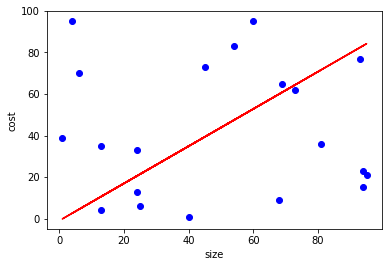

In [103]:
main()

---

### теперь воспользуемся готовой либой и предскажем для новых данных

In [ ]:
from sklearn.linear_model import LinearRegression

In [128]:
# x от 0 до 30
x = 30 * np.random.random((20, 1))
x

array([[16.35627971],
       [15.29983826],
       [14.54513565],
       [18.565905  ],
       [17.1349154 ],
       [ 6.90638249],
       [28.65845892],
       [24.53317923],
       [ 1.81215636],
       [23.31937447],
       [ 4.62689323],
       [10.21194867],
       [25.80935773],
       [18.62226152],
       [18.59501026],
       [26.73886402],
       [ 1.82171561],
       [29.95512074],
       [19.65807887],
       [ 6.55875409]])

In [129]:
# y = a*x + b с небольшим шумомм
y = 0.5 * x + 1.0 + np.random.normal(size=x.shape)
y

array([[ 8.00707992],
       [ 8.07883033],
       [ 8.04944273],
       [ 8.88834052],
       [10.22683014],
       [ 3.11790612],
       [15.57246334],
       [14.97329909],
       [ 1.55919474],
       [12.47010229],
       [ 4.67674268],
       [ 6.25089549],
       [13.08145572],
       [10.7266512 ],
       [10.51359805],
       [13.32251256],
       [ 0.71690614],
       [16.60864549],
       [11.81613708],
       [ 4.82029735]])

In [130]:
# создаем и обучаем модель
reg = LinearRegression()
model = reg.fit(x, y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [136]:
# предсказываем для новых данных с помощью `model.predict()`
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])
len(x_new), len(y_new)

(100, 100)

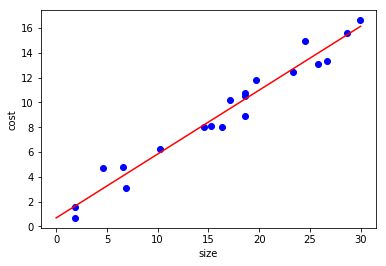

In [147]:
plt.xlabel('size')
plt.ylabel('cost')
plt.scatter(x, y,color='b')

plt.plot(x_new, y_new,color='r')

---

### простое задание:
построить лин рег с помощью numpy

In [148]:
# ваш код ниже